# <font color='#51A69D'> CUSTOMER PERSONALITY ANALYSIS

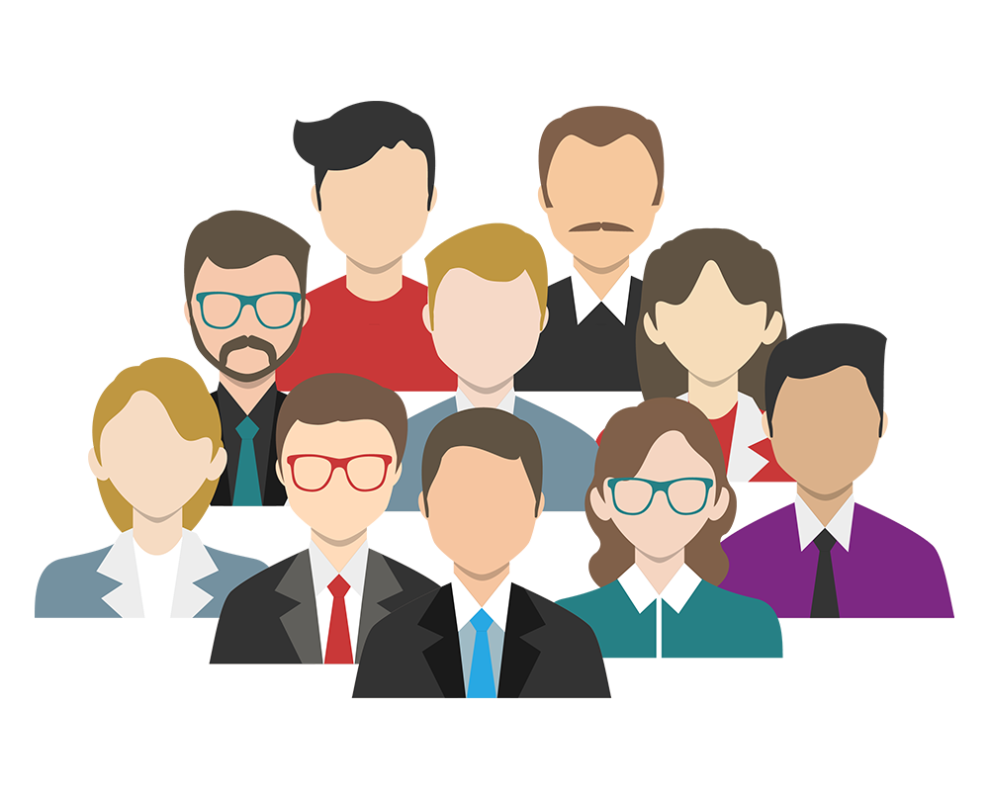

## <font color='#51A69D'>Introduction
Customer personality analysis is crucial for businesses to understand the diverse nature of their customer base and to tailor products and services that align with their preferences. In this project, we will apply clustering techniques to segment customers based on their demographic and behavioral attributes. The goal is to group customers into distinct segments, each representing a unique "personality" in terms of spending habits, demographics, and engagement levels.

## <font color='#51A69D'>Aim
The aim of this project is to perform a customer personality analysis using clustering algorithms, such as K-Means, to identify meaningful customer segments. We will utilize various features from the dataset, including demographic information (e.g., age, marital status, income) and behavioral data (e.g., purchase history, product preferences, customer complaints) to form customer clusters. By doing so, we hope to provide businesses with actionable insights that will help them better understand their customers and improve marketing strategies, product offerings, and customer service.

## <font color='#51A69D'>Dataset Explanation
The dataset used in this project contains a variety of customer attributes that can be used to analyze their personalities and behaviors. The columns in the dataset are as follows:

- **ID**: Unique identifier for each customer.
- **Year_Birth**: The year the customer was born (used to determine the age of the customer).
- **Education**: The educational level of the customer (e.g., Graduation, PhD).
- **Marital_Status**: The marital status of the customer (e.g., Single, Married, Together).
- **Income**: The income of the customer.
- **Kidhome**: Number of children living at home.
- **Teenhome**: Number of teenagers living at home.
- **Dt_Customer**: The date the customer joined the company.
- **Recency**: The number of days since the last purchase.
- **MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds**: Amount spent on various product categories.
- **NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases**: The number of purchases made through different channels (deals, web, catalog, store).
- **NumWebVisitsMonth**: The number of visits to the website per month.
- **AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5**: Whether the customer accepted various marketing campaigns (binary variable: 0 = not accepted, 1 = accepted).
- **Complain**: Whether the customer has complained (binary variable: 0 = no complaint, 1 = complaint).
- **Z_CostContact**: The cost of contacting the customer.
- **Z_Revenue**: The revenue generated from the customer.
- **Response**: Whether the customer responded to the last marketing campaign (binary variable: 0 = no response, 1 = responded).

The data provides a comprehensive view of each customer’s demographics, purchasing behavior, and responses to marketing campaigns. These features will be used to create customer clusters and analyze their personalities.

## <font color='#51A69D'> Requirements

In [200]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)
from scipy.cluster.hierarchy import dendrogram,linkage
import plotly.express as px
import datetime
from sklearn.preprocessing import StandardScaler

## <font color='#51A69D'> Import Data

In [24]:
df=pd.read_csv('marketing_campaign.csv',sep=';')

## <font color='#51A69D'> EDA (Exploratory Data Analysis)

In [27]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [29]:
df.shape

(2240, 29)

In [31]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## <font color='#51A69D'> Feature Engineering

In [42]:
df['Age']=datetime.datetime.now().year-df['Year_Birth']

In [46]:
df['Spending']=df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [58]:
df['Seniority']=pd.to_datetime(df['Dt_Customer'],dayfirst=True,format='%Y-%m-%d')

In [60]:
df['Seniority'] = pd.to_numeric(
    df['Seniority'].apply(lambda x: (datetime.datetime.now() - datetime.datetime.combine(x, datetime.datetime.min.time())).days),
    downcast='integer'
) / 30

In [62]:
df=df.rename(columns={'NumWebPurchases':'Web','NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

In [66]:
df['Marital_Status']=df['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple',
                                                   'Together':'In couple','Absurd':'Alone','Widow':'Alone',
                                                   'YOLO':'Alone'})

In [70]:
df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.mean()))

In [72]:
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate',
                                         'Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [74]:
df['Children']=df['Kidhome']+df['Teenhome']

In [76]:
df['Has_child']=np.where(df['Children']>0,'Has child','No child')

In [78]:
df['Children'].replace({3:'3 children',2:'2 children',1:'1 child',0:'No child'},inplace=True)

In [94]:
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat',
                      'MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

In [96]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Seniority,Children,Has_child
0,5524,1957,Postgraduate,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1617,151.166667,No child,No child
1,2174,1954,Postgraduate,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,27,132.833333,2 children,Has child
2,4141,1965,Postgraduate,In couple,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,776,139.466667,No child,No child
3,6182,1984,Postgraduate,In couple,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,53,133.700000,1 child,Has child
4,5324,1981,Postgraduate,In couple,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,422,134.433333,1 child,Has child


## <font color='#51A69D'> Modelling

In [162]:
x=df[['Age','Education','Marital_Status','Income','Spending','Seniority',
       'Has_child','Children','Wines','Fruits','Meat','Fish','Sweets','Gold']]

In [164]:
x=pd.get_dummies(x,drop_first=True)

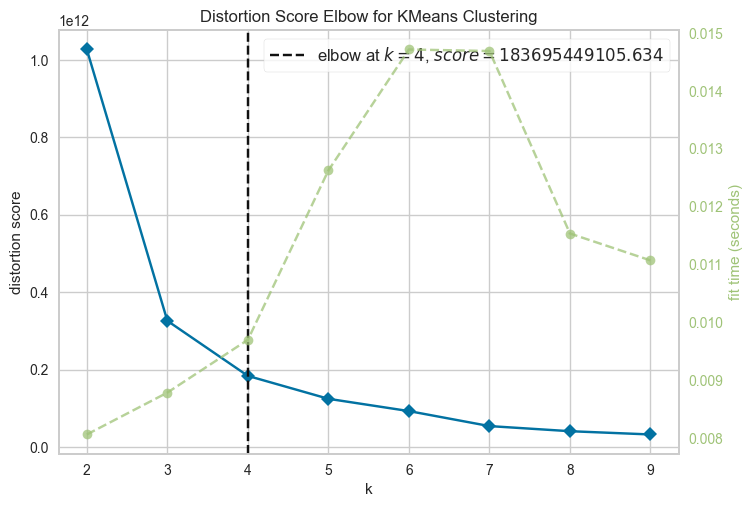

In [210]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show();

In [212]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [218]:
model=KMeans(4)
model=model.fit(x_scaled)
predicted=model.predict(x_scaled)

In [220]:
silhouette_score(x_scaled,predicted)

0.2822558888300965

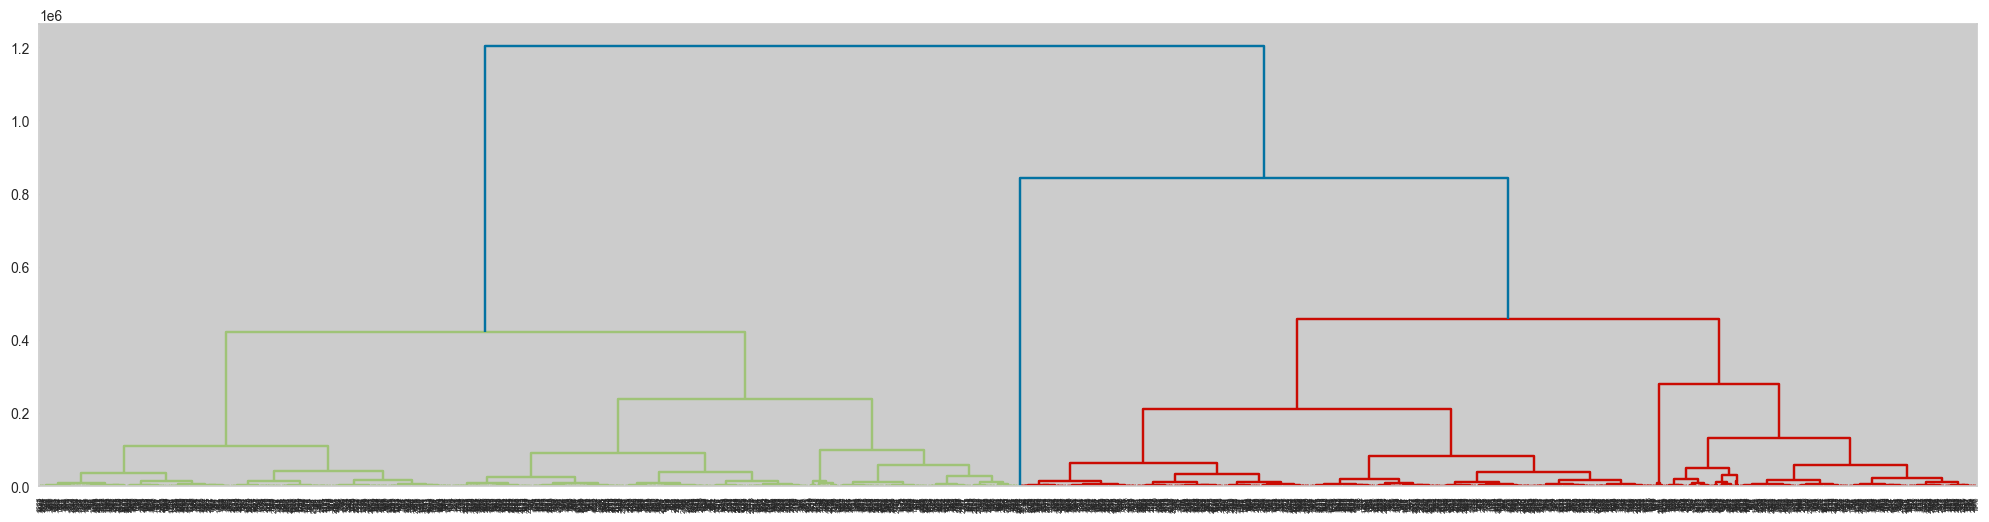

In [120]:
data=linkage(x,method='ward',metric='euclidean')
plt.figure(figsize=(25,6))
dendrogram(data);

## <font color='#51A69D'> Modelling Interpretation

In [228]:
df["Customer Cluster"]=predicted
df=df.replace({0:'Need Attention',1:'Stars',2:'High potential',3:'Leaky bucket'})

In [230]:
df["Customer Cluster"].value_counts()

Customer Cluster
High potential    1316
Stars              677
Need Attention     194
Leaky bucket        53
Name: count, dtype: int64

In [232]:
df.groupby('Customer Cluster')[['Income', 'Spending']].mean()

,Income,Spending
Customer Cluster,,
High potential,43715.346865,299.715046
Leaky bucket,47083.699269,274.603774
Need Attention,32721.440103,176.396907
Stars,74852.666183,1349.760709


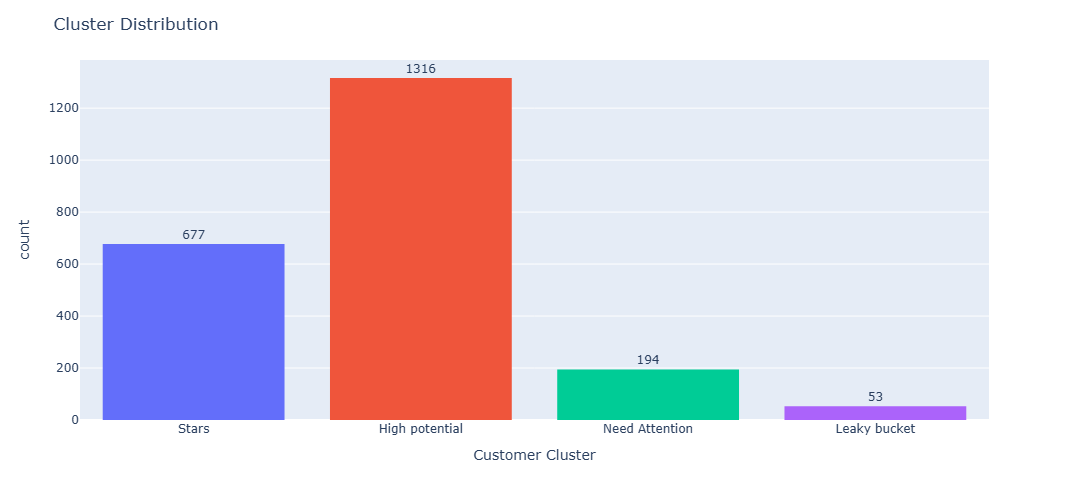

In [234]:
fig = px.histogram(df, x="Customer Cluster",color="Customer Cluster")
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.update_layout(
    title="Cluster Distribution",
    showlegend=False,  
    width=1200,  
    height=500   
)
fig.update_xaxes(tickvals=[0, 1, 2, 3,4,5,6,7])
fig.show()

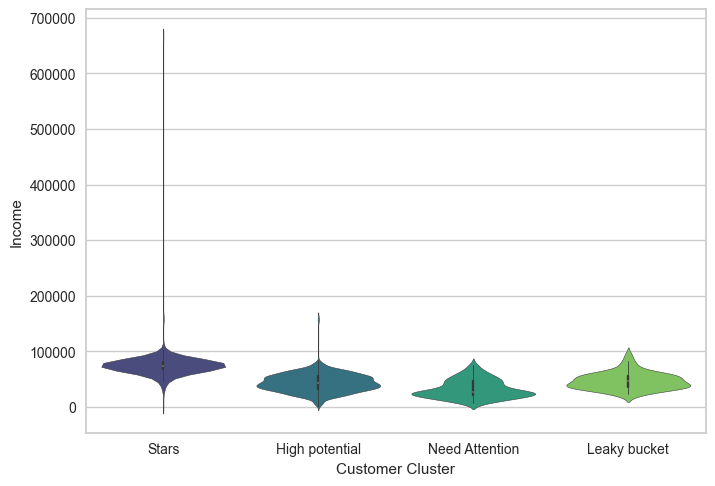

In [242]:
sns.violinplot(x="Customer Cluster", y="Income", data=df,palette="viridis");

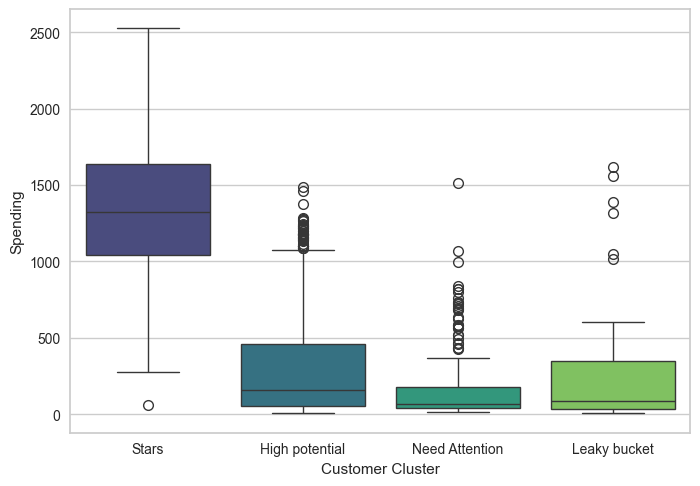

In [240]:
sns.boxplot(x="Customer Cluster", y="Spending", data=df,palette="viridis");

## <font color='#51A69D'>Cluster Group Interpretation
Given the 4 customer groups (Stars, Need Attention, High Potential, and Leaky Bucket), here’s how the Silhouette Score can be interpreted in relation to each cluster:
- **Stars**: If the cluster for old customers with high income and high spending is well-defined, it may contribute positively to the score. However, overlap with other clusters could reduce the score.
- **Need Attention**: New customers with below-average income and low spending might overlap with other groups like **Leaky Bucket** or even **High Potential**, leading to confusion and a lower score.
- **High Potential**: New customers with high income and high spending could have overlaps with **Stars** (old customers) if the distinction between new and old customers isn’t clear, negatively impacting the score.
- **Leaky Bucket**: This cluster, representing old customers with below-average income and low spending, might be difficult to distinguish from **Need Attention**, further reducing the overall score.

## <font color='#51A69D'>Conclusion
The **Silhouette Score of 0.28** suggests that the clustering model has weakly defined clusters, with significant overlap or ambiguity between some customer segments. While some separation exists, the results are not very clear-cut. This indicates that the choice of features, number of clusters, or clustering algorithm might not be optimal. To improve the clustering results, further steps such as feature engineering, standardization, and experimenting with different clustering algorithms and numbers of clusters should be considered.